<a href="https://colab.research.google.com/github/Slrosales/Colombianos-detenidos-en-el-exterior/blob/main/Colombianos_detenidos_en_el_exterior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Informe de análisis exploratorio y archivos necesarios para ejecutar el código**

Informe de análisis exploratorio: https://drive.google.com/file/d/1eqlMKPwLa0bUyJx1QVDdA1gI6RB6qnoK/view?usp=sharing

Archivos necesarios para ejecutar el código: https://drive.google.com/drive/folders/1h7JUtZAPZf2FQpphyImj84GVpd8Xhc2f?usp=sharing

# **2. Importación e instalación de librerías**

In [ ]:
import pandas as pd #Permite leer los archivos .CSV

In [ ]:
import matplotlib.pyplot as plt #Permite enerar los gráficos estadisticos

In [ ]:
import seaborn as sns #Permite mejorar visualemnte los gráficos

In [ ]:
import plotly.express as px #Permite la visualización de datos amigablemente (monocromaticos)

In [ ]:
import plotly.graph_objects as go #Permite crear mapas coropléticos ()

In [ ]:
pip install geopandas; #Paquete de instalación de geopandas

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 275 kB/s 
     |████████████████████████████████| 6.3 MB 39.4 MB/s 


In [ ]:
import geopandas as gpd #Permite el uso de datos de Pandas para las operaciones espaciales
                        #de tipos geométricos de SIG (puntos, líneas y polígonos)

In [ ]:
import math #Permite la realización de operaciones complejas como las logáritmos

In [ ]:
import folium #Permite crear mapas interactivos usando Leaflet

# **3. Importación del dataset “colombianos detenidos en el exterior”.**

In [ ]:
df_colombianos_presos = pd.read_csv('https://www.datos.gov.co/api/views/e97j-vuf7/rows.csv?accessType=DOWNLOAD');

df_colombianos_presos.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,FECHA PUBLICACIÓN,PAIS PRISIÓN,CONSULADO,DELITO,EXTRADITADO Y O REPATRIADO,SITUACIÓN JURÍDICA,GÉNERO,GRUPO EDAD,UBICACIÓN PAÍS,CANTIDAD,LATITUD,LONGITUD
0,2018-09-17,ECUADOR,C. QUITO,NARCOTRÁFICO,DESCONOCIDO,EN JUICIO,MASCULINO,DESCONOCIDO,"(-1.831239, -78.183406)",45,-1.831239,-78.183406
1,2018-09-17,ITALIA,C. ROMA,OTROS,DESCONOCIDO,EN INVESTIGACIÓN,MASCULINO,DESCONOCIDO,"(41.87194, 12.56738)",1,41.871940,12.567380
2,2018-09-17,ESTADOS UNIDOS,C. NUEVA YORK,EXTORSIÓN,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,"(37.09024, -95.712891)",1,37.090240,-95.712891
3,2018-09-17,MEXICO,C. MEXICO,OTROS,DESCONOCIDO,EN INVESTIGACIÓN,MASCULINO,ADULTO JOVEN,"(23.634501, -102.552784)",7,23.634501,-102.552784
4,2018-09-17,JAPON,C. TOKIO,ROBO / HURTO,DESCONOCIDO,CONDENADO,FEMENINO,ADULTO MAYOR,"(36.204824, 138.252924)",1,36.204824,138.252924


# **4. Gráficas estadísticas**

**===3.1 Relación del número de presos con respecto a la fecha===**

In [ ]:
select = ['FECHA PUBLICACIÓN', 'CANTIDAD']    #Selección de columnas a trabajar
groups = ['FECHA PUBLICACIÓN']    #Selección de columnas que agrupará la información

comportamiento_delitos = df_colombianos_presos[select].groupby(by = groups).sum()    #Creación de nuevo dataframe y le aplicamos la función sum

comportamiento_delitos.reset_index(inplace = True)    #Creación de índices numéricos

comportamiento_delitos    #Se imprime el dataframe para visualizar los datos

,FECHA PUBLICACIÓN,CANTIDAD
0,2018-09-17,23284
1,2019-01-01,24232
2,2019-07-04,25307
3,2019-09-11,25506
4,2020-01-13,26031
5,2020-03-01,26280
6,2020-04-17,25767
7,2020-05-01,25818
8,2020-06-01,25886
9,2020-07-01,26016


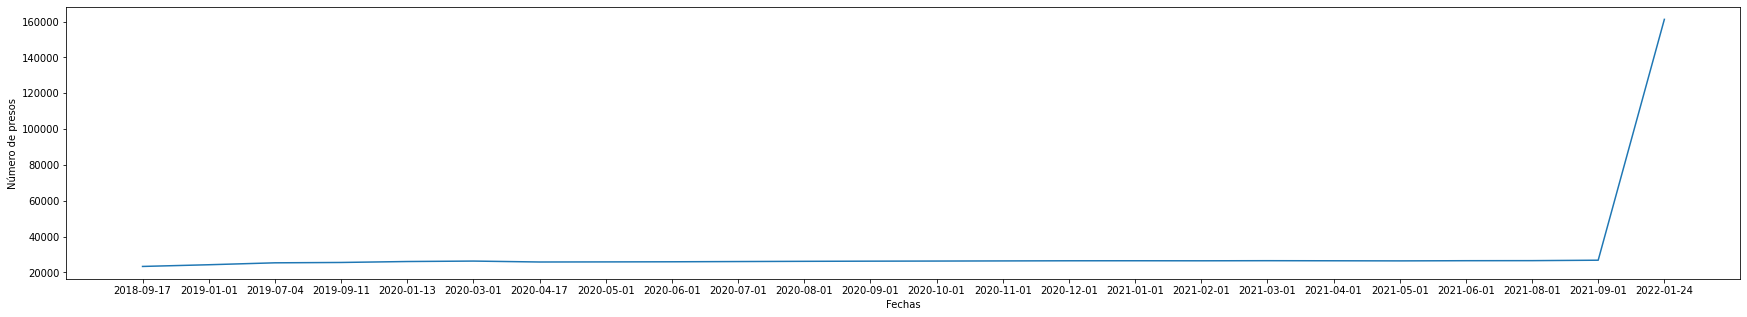

In [ ]:
plt.figure(figsize=(30,5))
sns.lineplot(data = comportamiento_delitos, x = "FECHA PUBLICACIÓN", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('Fechas');

#Creación de gráfico para visualizar el comportamiento

**===3.2 Top 5 de relación del número de presos con el país donde están recluidos ===**

In [ ]:
select2 = ['PAIS PRISIÓN', 'CANTIDAD']    
groups2 = ['PAIS PRISIÓN']    

#Creación de nuevo dataframe y le aplicamos la función sum
pais_mayor_detencion = df_colombianos_presos[select2].groupby(by = groups2).sum()    


#Ordenar el dataframe descendentemente con respecto a la columna 'CANTIDAD'
pais_mayor_detencion = pais_mayor_detencion.sort_values(by = 'CANTIDAD', ascending = False)   

pais_mayor_detencion.reset_index(inplace = True)    #Creación de índices numéricos

pais_mayor_detencion.head(5)    #Se imprime el dataframe para visualizar los datos

,PAIS PRISIÓN,CANTIDAD
0,DESCONOCIDO,123151
1,ESTADOS UNIDOS,108389
2,ECUADOR,107514
3,VENEZUELA,94674
4,ESPAÑA,93308


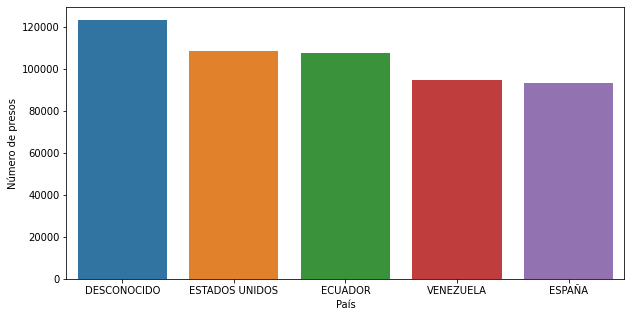

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = pais_mayor_detencion.head(5), x = "PAIS PRISIÓN", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('País');


In [ ]:
#Guardar el nombre del pais con mayor detención de colombianos en una variable
nombre_pais = pais_mayor_detencion['PAIS PRISIÓN'][0]  

#Guardar la cantidad de presos en una variable
cantidad_presos = pais_mayor_detencion['CANTIDAD'][0]   

**===3.3 Top 5 de relación del número de presos con respecto al tipo de delito cometido===**

In [ ]:
select3 = ['DELITO', 'CANTIDAD']   
groups3 = ['DELITO']    

delito_mayor_cometido = df_colombianos_presos[select3].groupby(by = groups3).sum()   

delito_mayor_cometido = delito_mayor_cometido.sort_values(by = 'CANTIDAD', ascending = False)  

delito_mayor_cometido.reset_index(inplace = True)   

delito_mayor_cometido.head(5)  

,DELITO,CANTIDAD
0,NARCOTRÁFICO,269190
1,DESCONOCIDO,111102
2,ROBO / HURTO,101529
3,NARCOTR�FICO,71670
4,HOMICIDIO / TENTATIVA DE,36531


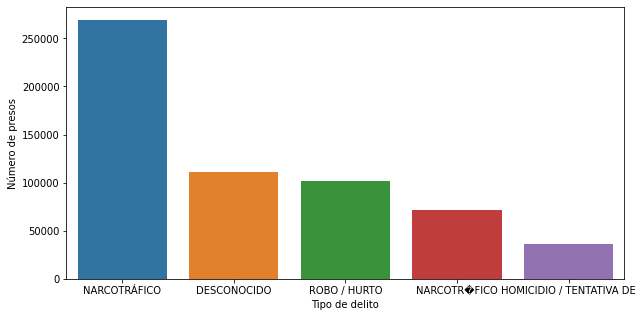

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = delito_mayor_cometido.head(5), x = "DELITO", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('Tipo de delito');


In [ ]:
nombre_delito = delito_mayor_cometido['DELITO'][0]    
cantidad_delitos = delito_mayor_cometido['CANTIDAD'][0]   

**===3.4 Relación del número de presos con respecto al rango edad cuando cometen un delito===**



In [ ]:
select4 = ['GRUPO EDAD', 'CANTIDAD']   
groups4 = ['GRUPO EDAD']   

edades_con_mas_delitos = df_colombianos_presos[select4].groupby(by = groups4).sum()    

edades_con_mas_delitos = edades_con_mas_delitos.sort_values(by = 'CANTIDAD', ascending = False)   

edades_con_mas_delitos.reset_index(inplace = True) 

edades_con_mas_delitos 

,GRUPO EDAD,CANTIDAD
0,ADULTO,371602
1,DESCONOCIDO,281481
2,ADULTO JOVEN,58232
3,ADULTO MAYOR,46213
4,PRIMERA INFANCIA,526
5,INFANTE,404
6,ADOLESCENTE,391


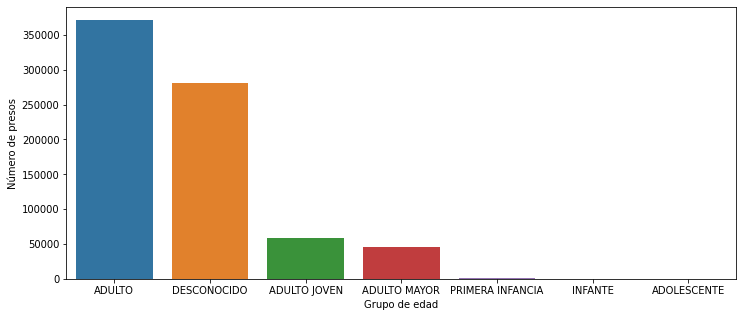

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data = edades_con_mas_delitos, x = "GRUPO EDAD", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('Grupo de edad');


In [ ]:
grupo_edad = edades_con_mas_delitos['GRUPO EDAD'][0]   
cantidad_edades = edades_con_mas_delitos['CANTIDAD'][0]  

In [ ]:
grupo_edad

'ADULTO'

**===3.5 Relación del número de presos con respecto al género de quienes cometen el delito===**



In [ ]:
select5 = ['GÉNERO', 'CANTIDAD']   
groups5 = ['GÉNERO']  

generos = df_colombianos_presos[select5].groupby(by = groups5).sum()   

generos = generos.sort_values(by = 'CANTIDAD', ascending = False)  

generos.reset_index(inplace = True)   

generos 

,GÉNERO,CANTIDAD
0,MASCULINO,661093
1,FEMENINO,97478
2,OTRO,158
3,DESCONOCIDO,120


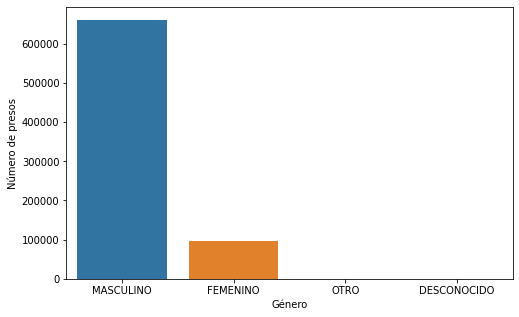

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data = generos, x = "GÉNERO", y = "CANTIDAD");
plt.ylabel('Número de presos');
plt.xlabel('Género');


In [ ]:
genero_mas_detenido = generos['GÉNERO'][0]    

# **5. Mapas mundiales con escala policromatica**

**===4.1 Corrección de datos geográficos===**

In [ ]:
#Nuevo df con nombres de paises corregidos

DF_NUEVO = df_colombianos_presos.replace({"BELGICA": "Bélgica","BONAIRE": "Bonaire",
                   "CANADA":"Canadá" , "COREA, REPUBLICA DE":"Corea del Sur","CURAÇAO":"Curazao","EMIRATOS ARABES UNIDOS": "Emiratos Árabes Unidos",
                   "ESTADOS UNIDOS": "Estados Unidos de América","FEDERACION DE RUSIA":"Rusia","GUYANA FRANCESA":"Guayana Francesa", "JAPON":"Japón","KAZAJSTAN":"Kazajistán","LIBANO":"Líbano",
                   "MEXICO":"México","PAISES BAJOS":"Países Bajos","PANAMA":"Panamá","PERU":"Perú","POLONIA":"Polonia","REPUBLICA CHECA":"República Checa",
                   "REPUBLICA DOMINICANA":"República Dominicana","KENIA":"Kenia","RUMANIA":"Rumanía","SUDAFRICA":"Sudáfrica","SURINAM":"Surinám" ,"TANZANIA, REPUBLICA UNIDA DE":"Tanzania",
                   "TURQUIA":"Turquía","VIET NAM":"Vietnam"
                   })

DF_NUEVO["PAIS PRISIÓN"] = DF_NUEVO ["PAIS PRISIÓN"].str.upper()

DF_NUEVO = DF_NUEVO.rename(columns={'PAIS PRISIÓN':'PAÍS'})

In [ ]:
#CSV con Info de Paises

paises = pd.read_csv("/content/INFO Paises.csv")

paises["nombre"] = paises["nombre"].str.upper()
paises[" name"] = paises[" name"].str.upper()

paises = paises.rename(columns={'nombre':'PAÍS',' name':'name'})

paises = paises.rename(columns={'nombre':'PAÍS'})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Coordenadas (Latitud y Longitud)

coordenadas = pd.read_csv("/content/Coordenadas.csv")

coordenadas = coordenadas.rename(columns={'Country':'COUNTRY'})

coordenadas['COUNTRY'] = coordenadas['COUNTRY'].str.upper()

coordenadas

,COUNTRY,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,AFGHANISTAN,AF,AFG,4,33.00000,65.000000
1,ALBANIA,AL,ALB,8,41.00000,20.000000
2,ALGERIA,DZ,DZA,12,28.00000,3.000000
3,AMERICAN SAMOA,AS,ASM,16,-14.33330,-170.000000
4,ANDORRA,AD,AND,20,42.50000,1.600000
...,...,...,...,...,...,...
241,YEMEN,YE,YEM,887,15.00000,48.000000
242,ZAMBIA,ZM,ZMB,894,-15.00000,30.000000
243,ZIMBABWE,ZW,ZWE,716,-20.00000,30.000000
244,CURAÇAO,CW,CUW,599,12.16957,-68.990020


In [ ]:
#Combinación de datasets (CSV con df corregido Colombianos detenidos en el exterior)

combinacion = pd.merge(paises, DF_NUEVO, on=['PAÍS'])

combinacion = combinacion.rename(columns={'name':'COUNTRY'})

combinacion.head()

,PAÍS,COUNTRY,nom,iso2,iso3,phone_code,FECHA PUBLICACIÓN,CONSULADO,DELITO,EXTRADITADO Y O REPATRIADO,SITUACIÓN JURÍDICA,GÉNERO,GRUPO EDAD,UBICACIÓN PAÍS,CANTIDAD,LATITUD,LONGITUD
0,ALBANIA,ALBANIA,Albanie,AL,ALB,355,2018-09-17,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,"(41.153332, 20.168331)",2,41.153332,20.168331
1,ALBANIA,ALBANIA,Albanie,AL,ALB,355,2019-01-01,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,"(41.153332, 20.168331)",2,41.153332,20.168331
2,ALBANIA,ALBANIA,Albanie,AL,ALB,355,2019-07-04,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,"(41.153332, 20.168331)",2,41.153332,20.168331
3,ALBANIA,ALBANIA,Albanie,AL,ALB,355,2019-09-11,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,"(41.153332, 20.168331)",2,41.153332,20.168331
4,ALBANIA,ALBANIA,Albanie,AL,ALB,355,2020-01-13,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,"(41.153332, 20.168331)",2,41.153332,20.168331


In [ ]:
#Combinación de datasets con coordenadas(latitud y longitud)

combinacion_2 = pd.merge(coordenadas, combinacion, on=['COUNTRY'])

combinacion_2 = combinacion_2.drop([' phone_code', ' iso2', ' nom','Alpha-2 code' , 
                                    'Alpha-3 code','Numeric code' , 'UBICACIÓN PAÍS' ,'LATITUD' ,'LONGITUD'], axis=1) #Se eliminan columnas innecesearias 

combinacion_2 = combinacion_2.rename(columns={' iso3':'ISO3', 'Latitude (average)':'LATITUD','Longitude (average)':'LONGITUD'}) #Se renombran columnas para mayor orden

combinacion_2

,COUNTRY,LATITUD,LONGITUD,PAÍS,ISO3,FECHA PUBLICACIÓN,CONSULADO,DELITO,EXTRADITADO Y O REPATRIADO,SITUACIÓN JURÍDICA,GÉNERO,GRUPO EDAD,CANTIDAD
0,ALBANIA,41.00000,20.000000,ALBANIA,ALB,2018-09-17,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,2
1,ALBANIA,41.00000,20.000000,ALBANIA,ALB,2019-01-01,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,2
2,ALBANIA,41.00000,20.000000,ALBANIA,ALB,2019-07-04,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,2
3,ALBANIA,41.00000,20.000000,ALBANIA,ALB,2019-09-11,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,2
4,ALBANIA,41.00000,20.000000,ALBANIA,ALB,2020-01-13,C. ROMA,NARCOTRÁFICO,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114742,BONAIRE,12.20189,-68.262383,BONAIRE,BES,2022-01-24,C. WILLEMSTAD,HOMICIDIO / TENTATIVA DE,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,1
114743,BONAIRE,12.20189,-68.262383,BONAIRE,BES,2022-01-24,C. WILLEMSTAD,HOMICIDIO / TENTATIVA DE,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,1
114744,BONAIRE,12.20189,-68.262383,BONAIRE,BES,2022-01-24,C. WILLEMSTAD,HOMICIDIO / TENTATIVA DE,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,1
114745,BONAIRE,12.20189,-68.262383,BONAIRE,BES,2022-01-24,C. WILLEMSTAD,HOMICIDIO / TENTATIVA DE,DESCONOCIDO,CONDENADO,MASCULINO,ADULTO,1


**====4.2 Cantidad de colombianos detenidos en el exteior===**



In [ ]:
select= ["PAÍS", "CANTIDAD", "LATITUD" , "LONGITUD", "ISO3"]
grupo = ["PAÍS", "LATITUD", "LONGITUD", "ISO3"]

df_cant_colombianos_detenidos_por_pais = combinacion_2[select].groupby(by=grupo).sum()
df_cant_colombianos_detenidos_por_pais.reset_index(inplace=True)


fig = px.choropleth(df_cant_colombianos_detenidos_por_pais, 
                    
    locations= 'ISO3',

    locationmode = "ISO-3",

    color_continuous_scale="sunset",

    color='CANTIDAD', 

    hover_name="PAÍS",

    title = "CANTIDAD DE COLOMBIANOS ACTIVOS DETENIDOS EN EL EXTERIOR <br>(Desde 2018 hasta la fecha)",

    labels={'CANTIDAD':'cantidad de detenidos ACTIVOS'}

    )
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True )
fig.update_layout(height=700)

fig

**===4.3 Cantidad de [Rango edad] detenidos en el exteior===**

In [ ]:
df_colombianos_presos['GRUPO EDAD'].unique()

array(['DESCONOCIDO', 'ADULTO', 'ADULTO JOVEN', 'ADULTO MAYOR',
       'PRIMERA INFANCIA', 'INFANTE', 'ADOLESCENTE'], dtype=object)

In [ ]:


Select_1=["PAÍS","GRUPO EDAD","CANTIDAD", "ISO3"]
Grupo_1 = ["PAÍS","GRUPO EDAD", "ISO3"]

df_grupo_edad = combinacion_2[Select_1].groupby(by= Grupo_1).sum()
df_grupo_edad.reset_index(inplace=True)

adulto = df_grupo_edad["GRUPO EDAD"] == "ADULTO"
df_adulto = df_grupo_edad[adulto]

fig = go.Figure(px.choropleth(df_adulto, 
                    
    locations= 'ISO3',

    locationmode = "ISO-3",

    color_continuous_scale="plasma",

    color='CANTIDAD', 

    hover_name="PAÍS",

    title = "CANTIDAD DE ADULTOS DETENIDOS EN EL EXTERIOR <br>(Desde 2018 hasta la fecha)",

    labels={'CANTIDAD':'NÚMERO DE DETENCIONES'}

    ))
fig.update_geos(projection_type="winkel tripel", lataxis_showgrid=True, lonaxis_showgrid=True)
fig.update_layout(height=700)
fig



# **6. Mapas mundiales con escala monocromatica**

**===5.1 Porcentaje de personas detenidas por [DELITO] en escala logarítmica base 10===**

In [ ]:
df_colombianos_presos['DELITO'].unique()

array(['NARCOTRÁFICO', 'OTROS', 'EXTORSIÓN', 'ROBO / HURTO',
       'DELITO MIGRATORIO', 'NO REPORTA – CONFIDENCIALIDAD ESTATAL',
       'HOMICIDIO / TENTATIVA DE', 'PORTE ILEGAL DE ARMAS',
       'CRIMEN ORGANIZADO', 'DAÑOS', 'DELITOS SEXUALES',
       'LESIONES PERSONALES', 'DESCONOCIDO', 'CONTRABANDO',
       'CELEBRACIÓN INDEBIDA DE CONTRATOS', 'TERRORISMO', 'SECUESTRO',
       'FALSEDAD EN DOCUMENTO', 'LAVADO DE ACTIVOS', 'FALSIFICACIÓN',
       'FRAUDE / ESTAFA', 'DESACATO A LA AUTORIDAD', 'AMENAZAS',
       'VIOLENCIA INTRAFAMILIAR', 'ALLANAMIENTO', 'TRATA DE PERSONAS',
       'CONDUCCIÓN TEMERARIA', 'VIOLENCIA DE GENERO', 'FALSO TESTIMONIO',
       'DELITOS POLÍTICOS', 'COACCIÓN', 'FALSIFICACI�N', 'NARCOTR�FICO',
       'NO REPORTA � CONFIDENCIALIDAD ESTATAL', 'EXTORSI�N',
       'DELITOS POL�TICOS', 'DA�OS', 'CONDUCCI�N TEMERARIA', 'COACCI�N',
       'CELEBRACI�N INDEBIDA DE CONTRATOS'], dtype=object)

In [ ]:
mask_delito = df_colombianos_presos["DELITO"]=='NARCOTRÁFICO'

df_delito = df_colombianos_presos[mask_delito]

df_delito = df_delito[['PAIS PRISIÓN', 'DELITO', 'CANTIDAD']]
df_delito

,PAIS PRISIÓN,DELITO,CANTIDAD
0,ECUADOR,NARCOTRÁFICO,45
6,DESCONOCIDO,NARCOTRÁFICO,1
9,"TANZANIA, REPUBLICA UNIDA DE",NARCOTRÁFICO,1
13,ITALIA,NARCOTRÁFICO,3
16,ESTADOS UNIDOS,NARCOTRÁFICO,10
...,...,...,...
121813,ESTADOS UNIDOS,NARCOTRÁFICO,36
121817,ESTADOS UNIDOS,NARCOTRÁFICO,1
121823,DESCONOCIDO,NARCOTRÁFICO,280
121824,ESPAÑA,NARCOTRÁFICO,1


In [ ]:
select = ['PAIS PRISIÓN', 'CANTIDAD']

groups = ['PAIS PRISIÓN']

df_delito_sum = df_delito[select].groupby(by = groups).sum()

df_delito_sum.reset_index(inplace=True)

total = df_delito_sum['CANTIDAD'].sum()

R = df_delito_sum.shape[0]

for i in range (0, R):

  df_delito_sum.iloc[i,1] = df_delito_sum.iloc[i,1]/total

df_delito_sum.iloc[-1, 0] = 'VIETNAM'

from math import log

for i in range (0, R):

  df_delito_sum.iloc[i,1] = log(df_delito_sum.iloc[i,1], 10)

df_delito_sum

,PAIS PRISIÓN,CANTIDAD
0,ALBANIA,-3.767301
1,ALEMANIA,-2.857187
2,ARGENTINA,-2.121068
3,ARUBA,-3.319469
4,AUSTRALIA,-2.632791
...,...,...
63,TRINIDAD Y TOBAGO,-3.967661
64,TURQUIA,-2.646870
65,URUGUAY,-3.144502
66,VENEZUELA,-1.167537


In [ ]:
shapefile = gpd.read_file('/content/Paises_Mundo.shp')

for i in range (0, 252):

  shapefile.iloc[i, 0] = shapefile.iloc[i, 0].upper() 

shapefile

,PAÍS,geometry
0,ARUBA (PAISES BAJOS),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,ANTIGUA Y BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,AFGANISTÁN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,ARGELIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,AZERBAIYÁN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,SUDÁN DEL SUR,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
248,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,TIMOR ORIENTAL,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ..."
250,CURAZAO (PAISES BAJOS),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


In [ ]:
shapefile_2 = shapefile.merge(right = df_delito_sum,
                     left_on = 'PAÍS',
                     right_on = 'PAIS PRISIÓN',
                     how = 'left')


for i in range (0, 252):


  if  shapefile_2.iloc[i, 2] == 'NaN':
    shapefile_2.iloc[i, 2] = shapefile_2.iloc[i, 0]


  if  math.isnan(shapefile_2.iloc[i, 3]):
    shapefile_2.iloc[i, 3] = -3.5

shapefile_2  

,PAÍS,geometry,PAIS PRISIÓN,CANTIDAD
0,ARUBA (PAISES BAJOS),"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,-3.5
1,ANTIGUA Y BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN,-3.5
2,AFGANISTÁN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",NaN,-3.5
3,ARGELIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",NaN,-3.5
4,AZERBAIYÁN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",NaN,-3.5
...,...,...,...,...
247,SUDÁN DEL SUR,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ...",NaN,-3.5
248,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",NaN,-3.5
249,TIMOR ORIENTAL,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",NaN,-3.5
250,CURAZAO (PAISES BAJOS),"POLYGON ((-68.96556 12.19889, -68.91196 12.181...",NaN,-3.5


[]

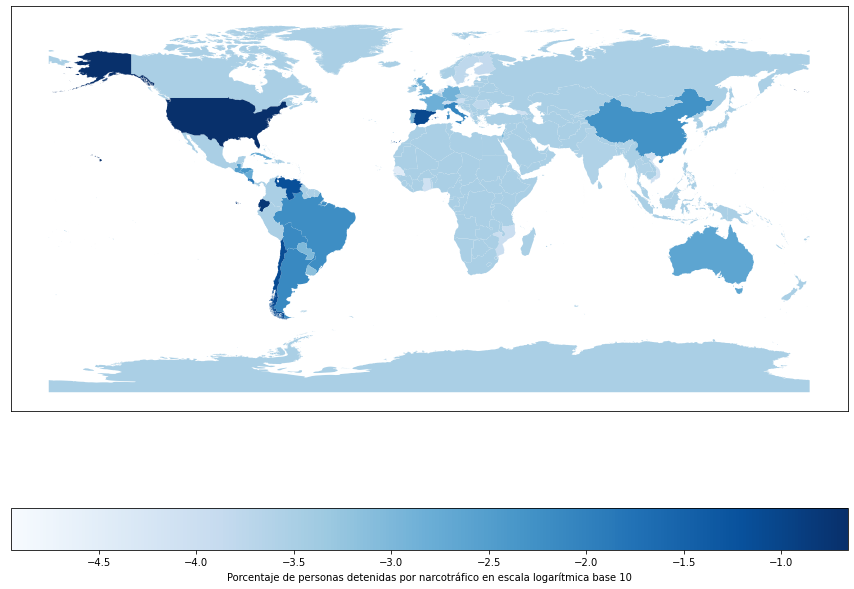

In [ ]:
plt.rcParams["figure.figsize"] = (15, 12)

shapefile_2.plot(column = 'CANTIDAD',  legend = True, 
            legend_kwds = {
              'label': "Porcentaje de personas detenidas por narcotráfico en escala logarítmica base 10",
              'orientation': "horizontal", 
              },
            cmap = 'Blues');

frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])

**===5.2 Relación monocromatica del género en detención con respectos a los paises===**

In [ ]:
df_colombianos_presos['GÉNERO'].unique()

array(['MASCULINO', 'FEMENINO', 'DESCONOCIDO', 'OTRO'], dtype=object)

In [ ]:
mask_genero = df_colombianos_presos["GÉNERO"]=='MASCULINO'

df_genero = df_colombianos_presos[mask_genero]

df_genero = df_genero[['PAIS PRISIÓN', 'GÉNERO', 'CANTIDAD']]
df_genero

,PAIS PRISIÓN,GÉNERO,CANTIDAD
0,ECUADOR,MASCULINO,45
1,ITALIA,MASCULINO,1
2,ESTADOS UNIDOS,MASCULINO,1
3,MEXICO,MASCULINO,7
5,ITALIA,MASCULINO,1
...,...,...,...
154227,ESPA�A,MASCULINO,5
154228,VENEZUELA,MASCULINO,2
154229,VENEZUELA,MASCULINO,5
154231,ARGENTINA,MASCULINO,1


In [ ]:
select = ['PAIS PRISIÓN', 'CANTIDAD']

groups = ['PAIS PRISIÓN']

df_genero_sum = df_genero[select].groupby(by = groups).sum()

df_genero_sum.reset_index(inplace=True)

total = df_genero_sum['CANTIDAD'].sum()

R = df_genero_sum.shape[0]

for i in range (0, R):

  df_genero_sum.iloc[i,1] = df_genero_sum.iloc[i,1]/total

df_genero_sum.iloc[-1, 0] = 'VIETNAM'

for i in range (0, R):

  df_genero_sum.iloc[i,1] = log(df_genero_sum.iloc[i,1], 10)

df_genero_sum.head(10)

,PAIS PRISIÓN,CANTIDAD
0,ALBANIA,-4.157505
1,ALEMANIA,-2.714072
2,ARGENTINA,-1.740503
3,ARUBA,-2.916630
4,AUSTRALIA,-2.840259
5,AUSTRIA,-3.650001
6,BELGICA,-3.154682
7,BIELORRUSIA,-5.042111
8,BOLIVIA,-2.070063
9,BONAIRE,-4.357865


In [ ]:
shapefile_2 = shapefile.merge(right = df_genero_sum,
                     left_on = 'PAÍS',
                     right_on = 'PAIS PRISIÓN',
                     how = 'left')



for i in range (0, 252):


  if  shapefile_2.iloc[i, 2] == 'NaN':
    shapefile_2.iloc[i, 2] = shapefile_2.iloc[i, 0]


  if  math.isnan(shapefile_2.iloc[i, 3]):
    shapefile_2.iloc[i, 3] = -4.5

shapefile_2    

,PAÍS,geometry,PAIS PRISIÓN,CANTIDAD
0,ARUBA (PAISES BAJOS),"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,-4.5
1,ANTIGUA Y BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN,-4.5
2,AFGANISTÁN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",NaN,-4.5
3,ARGELIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",NaN,-4.5
4,AZERBAIYÁN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",NaN,-4.5
...,...,...,...,...
247,SUDÁN DEL SUR,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ...",NaN,-4.5
248,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",NaN,-4.5
249,TIMOR ORIENTAL,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",NaN,-4.5
250,CURAZAO (PAISES BAJOS),"POLYGON ((-68.96556 12.19889, -68.91196 12.181...",NaN,-4.5


[]

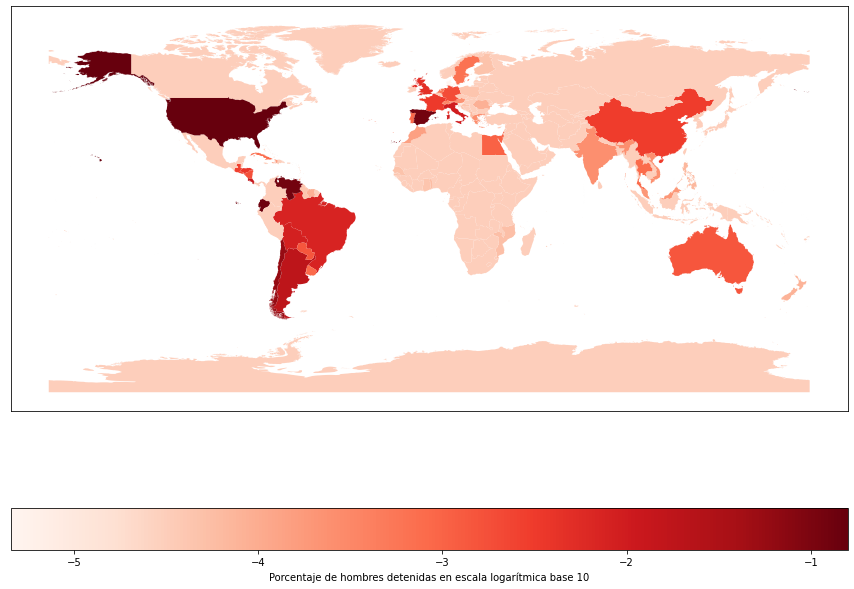

In [ ]:
plt.rcParams["figure.figsize"] = (15, 12)

shapefile_2.plot(column = 'CANTIDAD',  legend = True, 
            legend_kwds = {
              'label': "Porcentaje de hombres detenidas en escala logarítmica base 10",
              'orientation': "horizontal", 
              },
            cmap = 'Reds');

frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])

# **7. Mapa interactivo**

In [ ]:
Mapa = folium.Map(location=[26.3351,	17.228331] , zoom_start=3 ,tiles="https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryTopo/MapServer/tile/{z}/{y}/{x}", 
                  attr='Tiles courtesy of the <a href="https://usgs.gov/">U.S. Geological Survey</a>' )

for each in df_cant_colombianos_detenidos_por_pais.iterrows():
  
  lat = each[1]['LATITUD']
  longi = each[1]['LONGITUD']
  Cantidad = each[1]['CANTIDAD']

  popup_text = """País: {}<br>
                  Cantidad de detenidos : {}<br>"""
                 
  popup_text = popup_text.format(each[1]['PAÍS'], each[1]['CANTIDAD'])
                                   
  pp = folium.Popup(popup_text, max_width=500)

  #RANGO DE COLORES PARA MARCADORES SEGÚN CANTIDAD
  if Cantidad >= 60000 :
                icon = folium.Icon(color="red")
  elif Cantidad >= 10000 :
                icon = folium.Icon(color="orange")
  elif Cantidad >= 1000 :
                icon = folium.Icon(color="blue")
  else:
                icon = folium.Icon(color="green")
 
  Marker = folium.Marker(location = [lat,longi],
                popup = pp,
                icon = icon,
                ).add_to(Mapa)

from branca.element import Template, MacroElement

#LEYENDA HTML
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:18px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>CANTIDAD DE DETENCIONES</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Mayor o igual que 60.000 detenciones</li>
    <li><span style='background:orange;opacity:0.7;'></span>Mayor o igual que 10.000 y menor que 60.000 detenciones</li>
    <li><span style='background:#2AB4C7 ;opacity:0.7;'></span>Mayor o igual que 1.000 y menor que 10.000 detenciones</li>
    <li><span style='background:#2FA72C;opacity:0.7;'></span>Menos de 1.000 detenciones</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 100%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 90%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

Mapa.get_root().add_child(macro)

# https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd, Autor Código de leyenda: Colin Talbert 
Mapa